In [41]:
import sys
sys.path.insert(0, '../src/')
import plot_utils

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [42]:
df = pd.read_csv('../data_out/temp_full.csv', parse_dates=['DateTime'])
score_df = pd.read_csv('../data_out/temp_full_score.csv')
score_df

,Models,rmse,rsqr,mbe,corr,stddev
0,val_Layer1_LGBM,0.402,0.505,-0.004,0.710,0.424
1,val_Layer1_RFE,0.404,0.488,-0.002,0.683,0.374
2,val_Layer1_SVM,0.477,0.421,-0.053,0.644,0.438
3,val_Layer1_GP,0.529,0.336,0.011,0.574,0.346
4,val_Layer1_ANN,0.542,0.405,0.029,0.630,0.337
5,val_Layer2_ensemble_LGBM,0.438,0.486,0.002,0.696,0.435
6,Layer2_LSTM_ensemble,2.882,0.399,0.196,0.632,2.254
7,val_Layer2_single_LGBM,0.447,0.466,-0.000,0.681,0.427
8,Layer2_LSTM_single,3.043,0.353,0.267,0.594,1.662
9,Layer2_LGBM_single,2.945,0.394,0.568,0.627,2.527


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7248 entries, 0 to 7247
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Unnamed: 0                       7248 non-null   int64         
 1   Ta                               7248 non-null   float64       
 2   Ws                               7248 non-null   float64       
 3   Fg                               7248 non-null   float64       
 4   VPD                              7248 non-null   float64       
 5   Fn                               7248 non-null   float64       
 6   q                                7248 non-null   float64       
 7   Ts                               7248 non-null   float64       
 8   Sws                              7248 non-null   float64       
 9   EVI                              7248 non-null   float64       
 10  Set_rank                         7248 non-null   object     

In [ ]:
yvar = 'Fc'

In [44]:
test_df = df[(df['Set_rank']=='test') & (~df[yvar].isna())].copy()

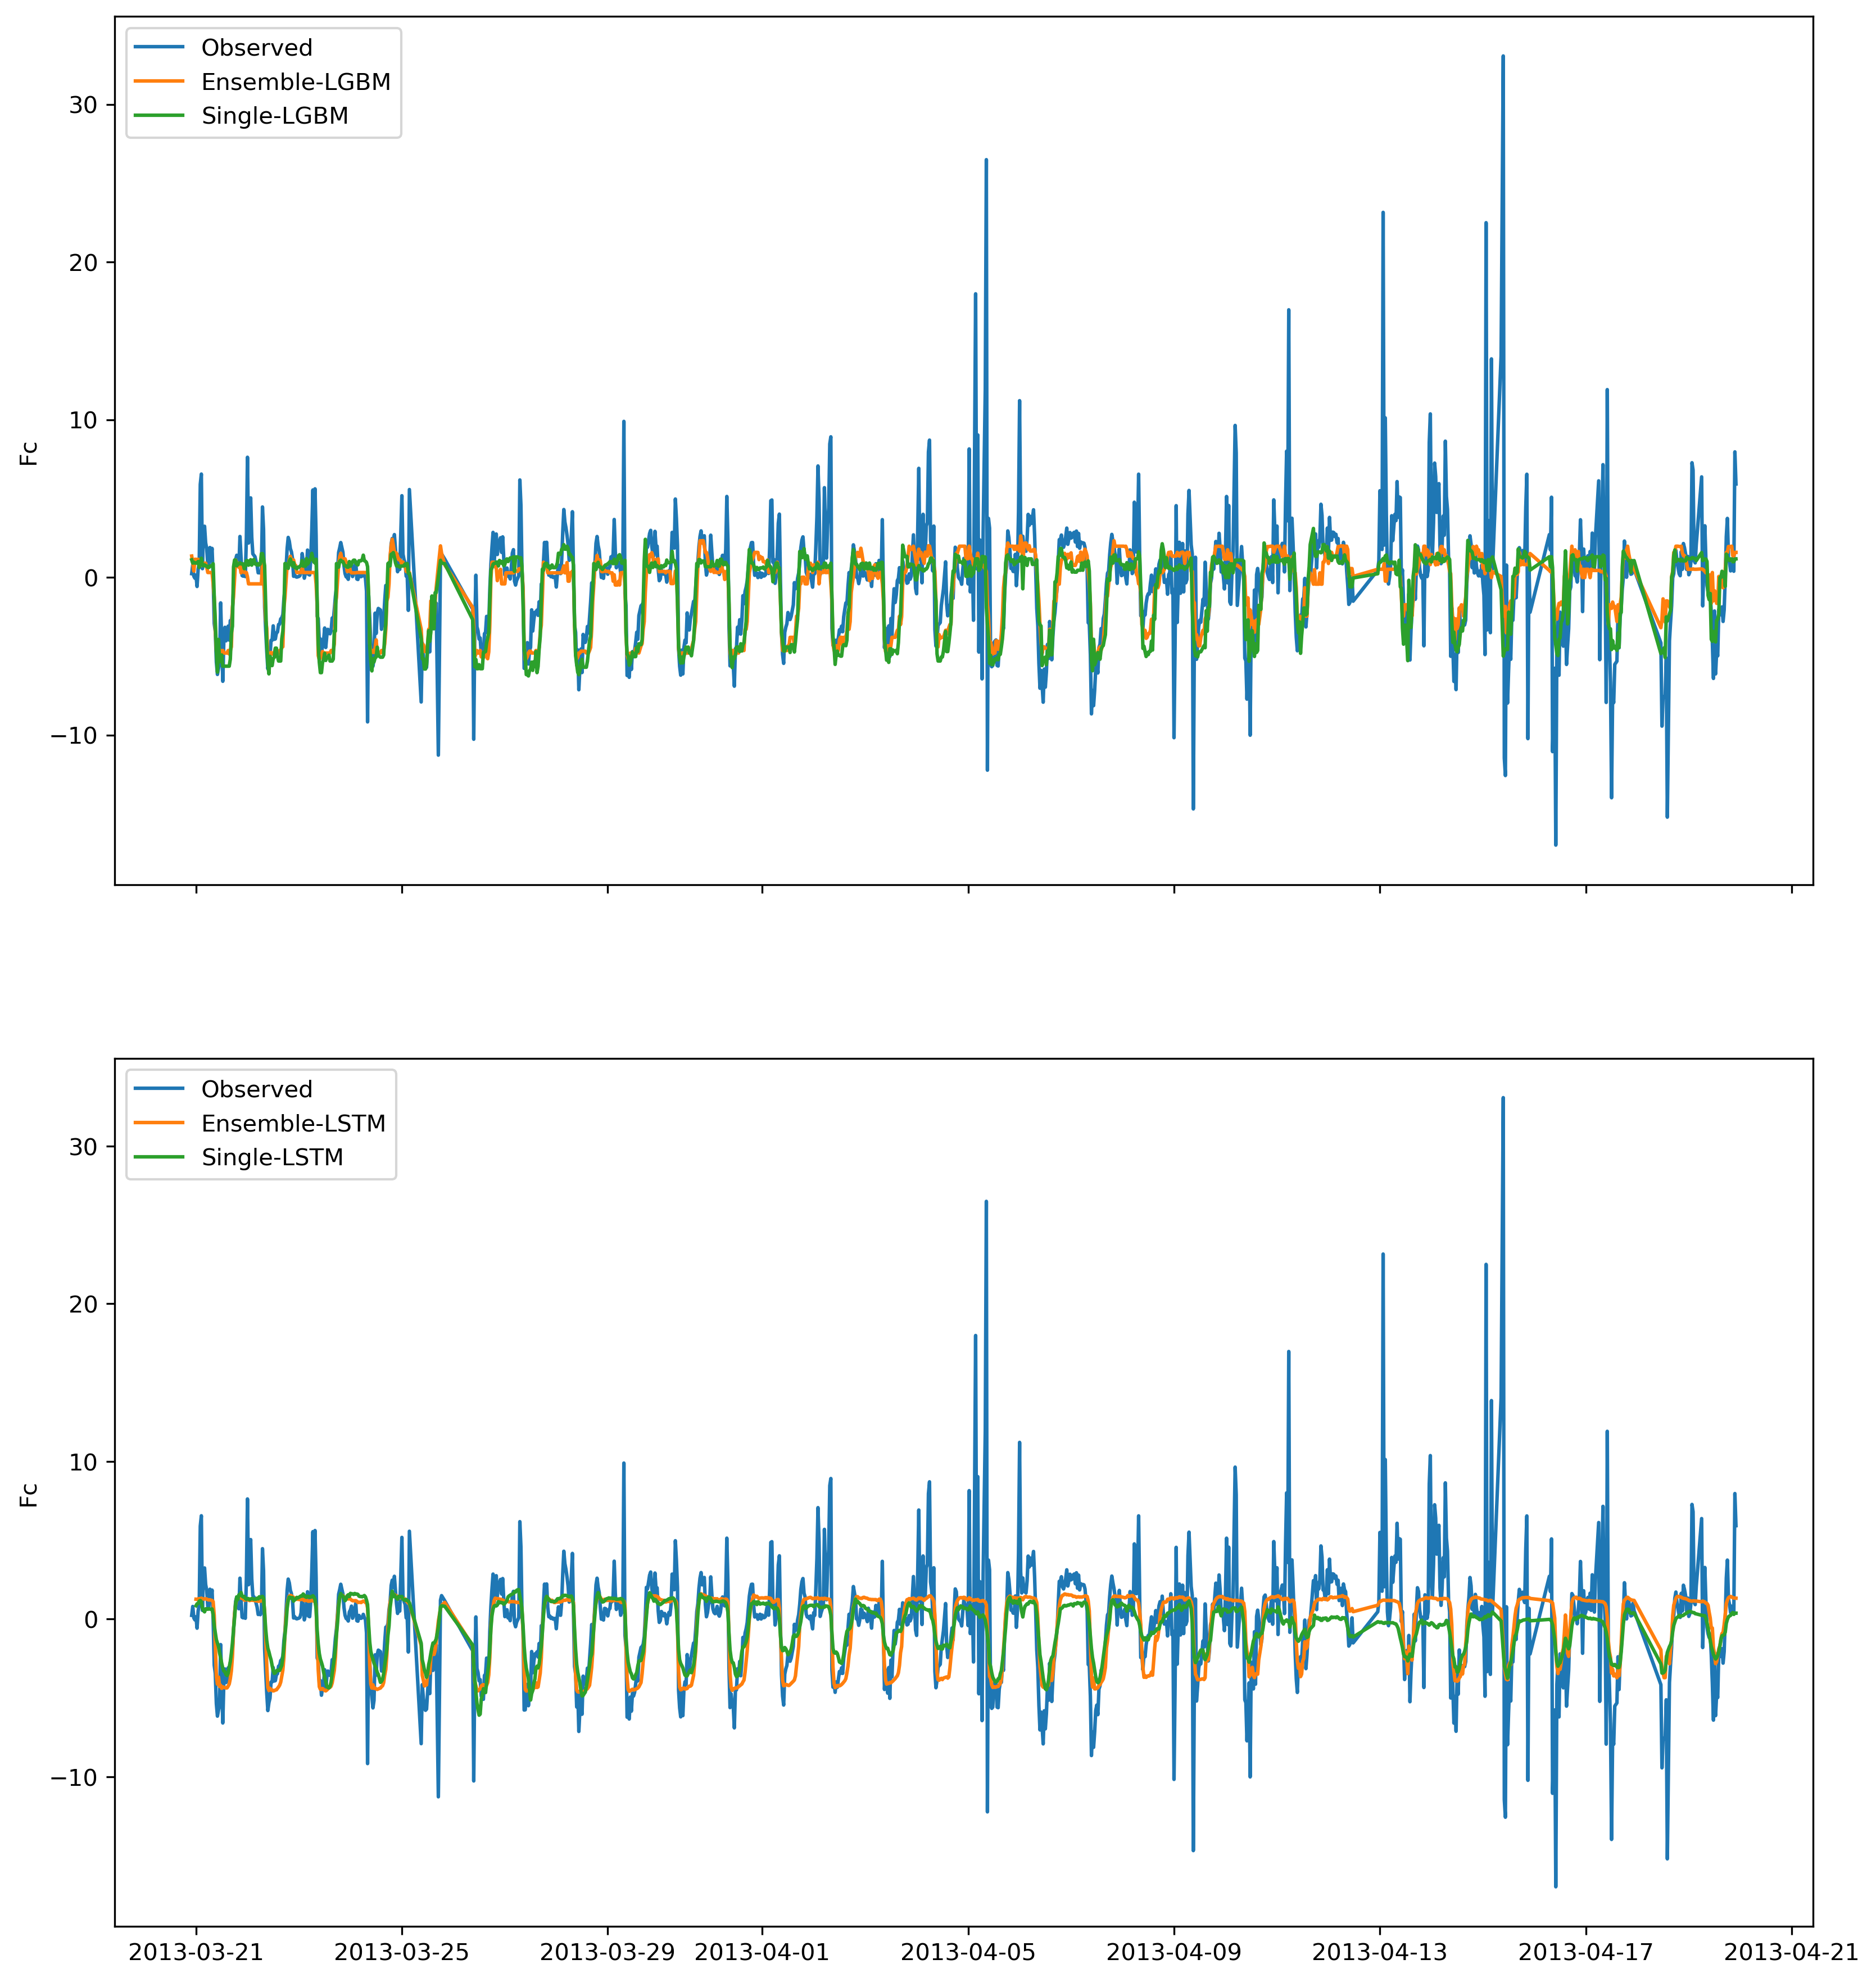

In [48]:
fig, ax = plt.subplots(figsize=(13,15), nrows=2, sharex=True, sharey=True, dpi=300)

for j, name in enumerate(['LGBM',  'LSTM']):
    ax[j].plot(test_df['DateTime'].values, test_df[yvar].values ,label='Observed')
    ax[j].plot(test_df['DateTime'].values, test_df[f'{yvar}_predicted_test_ensemble_' + name].values, 
               label='Ensemble-' + name)
    ax[j].plot(test_df['DateTime'].values, test_df[f'{yvar}_predicted_test_single_' + name].values, 
               label='Single-' + name)
    ax[j].legend(loc='upper left')
    ax[j].set_ylabel(yvar)

In [46]:
layer2_models = score_df[(~score_df['Models'].str.contains('val'))]

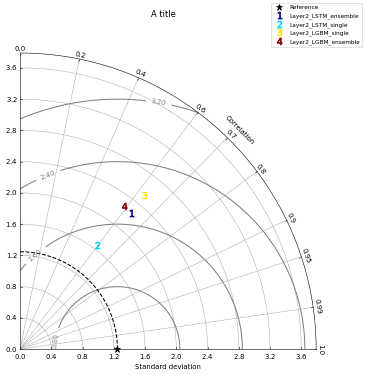

In [47]:
# Make dpi=300
metric = layer2_models[['stddev', 'corr', 'Models']].values
fig = plot_utils.taylor_diagram(metric, dpi=50, title='A title')
fig.savefig('savefn.png', dpi=300)